In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [17]:
data = pd.read_csv('Quiz-P4.csv')
data

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,1643543,40
1,2,M,00:32:40,27,1643560,34
2,3,M,00:33:15,76,1643595,44
3,4,M,00:33:23,76,1643603,46
4,5,M,00:33:29,76,1643609,26
...,...,...,...,...,...,...
335,336,F,01:08:34,27,1645714,41
336,337,F,01:08:36,27,1645716,48
337,338,M,01:09:31,27,1645771,24
338,339,F,01:09:31,27,1645771,25


In [19]:
data['cat'] = 0
data.loc[data['Age'] <= 30, 'cat'] = '- 30'
data.loc[(data['Age'] > 30) & (data['Age'] <= 40), 'cat'] = '30-40'
data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'cat'] = '40-50'
data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'cat'] = '50-60'
data.loc[(data['Age'] > 60), 'cat'] = '60+'
data

,Position,Sexe,Temps,Dept,Temps_secondes,Age,cat
0,1,M,00:32:23,76,1643543,40,30-40
1,2,M,00:32:40,27,1643560,34,30-40
2,3,M,00:33:15,76,1643595,44,40-50
3,4,M,00:33:23,76,1643603,46,40-50
4,5,M,00:33:29,76,1643609,26,- 30
...,...,...,...,...,...,...,...
335,336,F,01:08:34,27,1645714,41,40-50
336,337,F,01:08:36,27,1645716,48,40-50
337,338,M,01:09:31,27,1645771,24,- 30
338,339,F,01:09:31,27,1645771,25,- 30


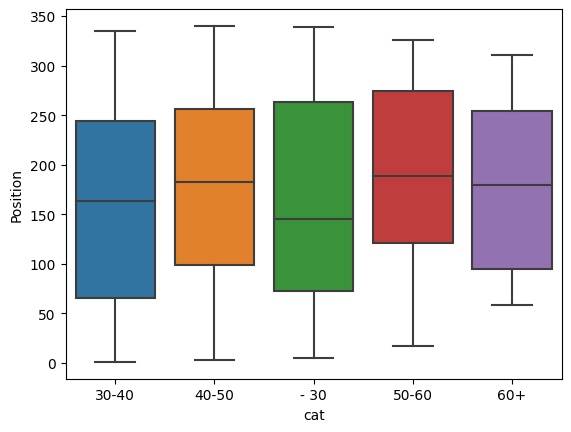

In [20]:
sns.boxplot(y='Position', x='cat', data=data, orient='v')
plt.show()

In [21]:
Y = data['Position']
X = data[["Age"]].copy()
X['intercept'] = 1
result = sm.OLS(Y, X).fit()

a,b = result.params
print(a, b, result.rsquared)

0.8621766194622947 134.33169081355678 0.011249764860875588


In [22]:
X = "Sexe" # qualitative
Y = "Temps_secondes" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(data[X],data[Y])

0.20400517398334017